In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
%matplotlib inline
import csv
import numpy as np
import resistive_pulse as rp
import copy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import butter, lfilter
import itertools
from astroML.plotting import hist
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import rp_file
from matplotlib.font_manager import FontProperties
from numpy.random import uniform

from scipy.interpolate import interp1d

In [2]:
title_size = 24
axislabel_size = 24
legendtitle_size = 18
axistick_size = 18
legendtext_size = 16
label_size = 16

font0 = FontProperties()
font0.set_weight('bold')

# Load files

In [3]:
# 7-22
directory = '/home/preston/Desktop/Science/Research/cancer_cells/data/7-22-2016/events/'
file_names = ['HCT116_pr0003_0007_events', 'HCT116_pr0006_0002_events', 'HCT116_pr0012_0000_events', 'HCT116_pr0018_0000_events']
file_paths = [directory + file_name for file_name in file_names]

HCT116_0003_722_events = rp.open_event_file(file_paths[0])
HCT116_0006_722_events = rp.open_event_file(file_paths[1])
HCT116_0012_722_events = rp.open_event_file(file_paths[2])
HCT116_0018_722_events = rp.open_event_file(file_paths[3])

# 7-29
directory = '/home/preston/Desktop/Science/Research/cancer_cells/data/7-29-2016/events/'
file_names = ['HCT116_pr0003_0000_split0_events', 'HCT116_pr0003_0000_split1_events', 'HCT116_pr0003_0000_split2_events',\
              'HCT116_pr0006_0000_split0_events', 'HCT116_pr0006_0000_split1_split0_events',\
              'HCT116_pr0006_0000_split1_split1_events', 'HCT116_pr0006_0000_split2_events', 'HCT116_pr0006_0000_split3_events',\
              'HCT116_pr0012_0000_split0_events', 'HCT116_pr0012_0000_split1_events', 'HCT116_pr0012_0000_split2_events',\
              'HCT116_pr0012_0000_split3_events', 'HCT116_pr0012_0000_split4_events']
file_paths = [directory + file_name for file_name in file_names]

HCT116_0003_729_events = []
HCT116_0003_729_events += rp.open_event_file(file_paths[0])
HCT116_0003_729_events += rp.open_event_file(file_paths[1])
HCT116_0003_729_events += rp.open_event_file(file_paths[2])

HCT116_0006_729_events = []
HCT116_0006_729_events += rp.open_event_file(file_paths[3])
HCT116_0006_729_events += rp.open_event_file(file_paths[4])
HCT116_0006_729_events += rp.open_event_file(file_paths[5])
HCT116_0006_729_events += rp.open_event_file(file_paths[6])
HCT116_0006_729_events += rp.open_event_file(file_paths[7])

HCT116_0012_729_events = []
HCT116_0012_729_events += rp.open_event_file(file_paths[8])
HCT116_0012_729_events += rp.open_event_file(file_paths[9])
HCT116_0012_729_events += rp.open_event_file(file_paths[10])
HCT116_0012_729_events += rp.open_event_file(file_paths[11])
HCT116_0012_729_events += rp.open_event_file(file_paths[12])

# 8-2
directory = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-2-2016/15um_20um/events/'
file_names = ['15um_20um_pr0004_0000_split0_events', '15um_20um_pr0004_0000_split1_events', '15um_20um_pr0004_0000_split2_events',\
              '15um_20um_pr0008_0000_split0_events', '15um_20um_pr0008_0000_split1_events', '15um_20um_pr0008_0000_split2_events',\
              '15um_20um_pr0012_0000_events', '15um_20um_pr0016_0000_events']
file_paths = [directory + file_name for file_name in file_names]

s15um_20um_0004_events = []
s15um_20um_0004_events += rp.open_event_file(file_paths[0])
s15um_20um_0004_events += rp.open_event_file(file_paths[1])
s15um_20um_0004_events += rp.open_event_file(file_paths[2])

s15um_20um_0008_events = []
s15um_20um_0008_events += rp.open_event_file(file_paths[3])
s15um_20um_0008_events += rp.open_event_file(file_paths[4])
s15um_20um_0008_events += rp.open_event_file(file_paths[5])

s15um_20um_0012_events = []
s15um_20um_0012_events += rp.open_event_file(file_paths[6])

s15um_20um_0016_events = []
s15um_20um_0016_events += rp.open_event_file(file_paths[7])

# Select data slice

In [70]:
def get_rel_amplitude(event):
    return (event._baseline[1] - np.min(event._data[:,1]))/np.min(event._data[:,1])

In [71]:
event_list = []
top_thresh = .008
bot_thresh = .005
for i, event in enumerate(s15um_20um_0016_events):
    amp = get_rel_amplitude(event)
    if amp < top_thresh and amp > bot_thresh:
        event_list.append(event)

In [72]:
print len(event_list)

320


# Find event extrema

In [75]:
sigma = 4

for i, event in enumerate(event_list):
    maxima, minima=rp.get_maxima_minima(event._data[:,1], sigma=sigma, refine_length=3, num_maxima = 2, num_minima = 3)
    event.set_extrema(maxima, minima)

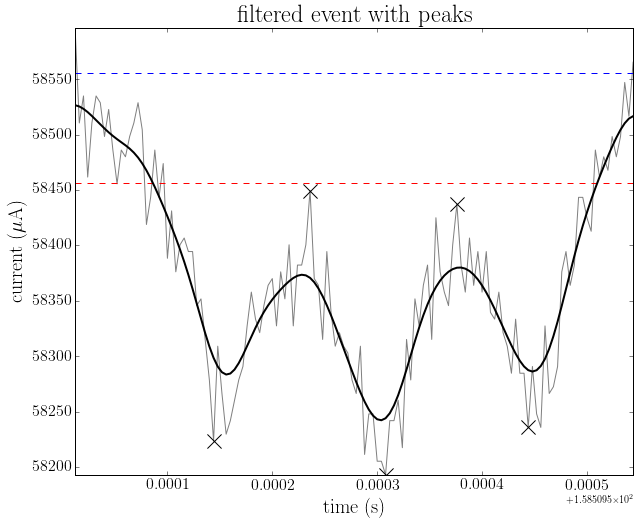

In [76]:
event = event_list[-1]

fig = plt.figure(figsize = (10,8))



filtered_data = gaussian_filter(event._data[:,1], sigma=sigma)
plt.plot(event._data[:,0], event._data[:,1], c = (.5,.5,.5))
plt.plot(event._data[:,0], filtered_data, c = (0,0,0), lw = 2, zorder = 9)
plt.plot([event._data[0,0],event._data[-1,0]],[event._baseline[1], event._baseline[1]], c = (0,0,1.), ls = '--')
plt.plot([event._data[0,0],event._data[-1,0]],[event._baseline[2], event._baseline[2]], c = (1.,0,0), ls = '--')
plt.plot([event._data[0,0],event._data[-1,0]],[event._baseline[3], event._baseline[3]], c = (1.,0,0), ls = '--')
for point in event._extrema:
    plt.scatter(event._data[point,0], event._data[point,1], c = (0.,0.,0.), marker = 'x', s = 200, zorder = 10)

plt.title('filtered event with peaks', size = 24)
plt.xlabel('time (s)', size = 20)
plt.ylabel(r'current ($\mu$A)', size = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.xlim(event._data[0,0], event._data[-1,0])
plt.ylim(event._data[:,1].min(), event._data[:,1].max())


plt.show()

In [77]:
print len(event_list)

320


# Create interpolated data

In [78]:
interpolated_data_list = np.empty((len(event_list), 1000))
print interpolated_data_list.shape
for i, event in enumerate(event_list):
    ind1 = event._extrema[0]
    ind2 = event._extrema[-1]
    new_data = np.empty((ind2-ind1+1, 2))
    new_data[:,0] = (event._data[ind1:ind2+1,0]-event._data[ind1,0])/(event._data[ind2,0]-event._data[ind1,0])
    new_data[:,1] = (event._data[ind1:ind2+1,1]-event._baseline[1])/event._data[ind1:ind2+1,1]
    interpolation = interp1d(new_data[:,0], new_data[:,1])
    interpolated_data = []
    for j in range(1000):
        interpolated_data.append(interpolation(j/1000.0))
    interpolated_data_list[i,:] = interpolated_data

(320, 1000)


# Create composite from interpolated data

In [79]:
composite_ps_0016 = interpolated_data_list.sum(axis = 0)/interpolated_data_list.shape[0]

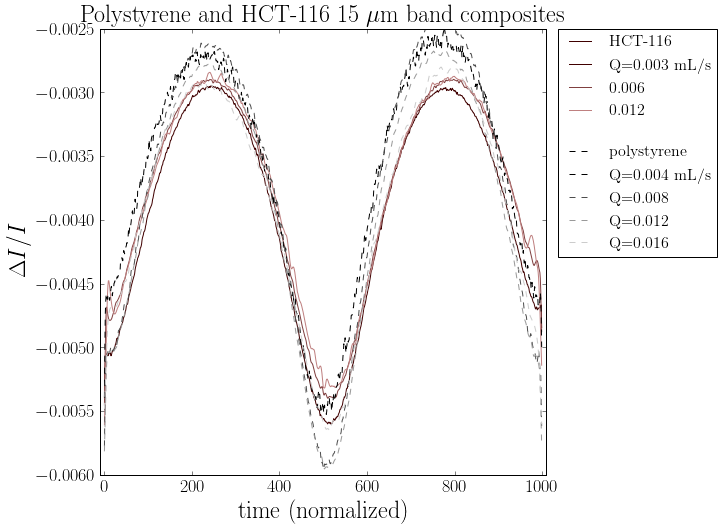

In [139]:
fig = plt.figure(figsize = (8,8))

colors_0 = [(.0,.0,.0), (.3,.3,.3), (.6,.6,.6), (.8,.8,.8)]
colors_1 = [(.25,0,0), (.5,.25,.25), (.75,.5,.5), (1.,.75,.75)]

plt.plot([0], lw = 1, color = colors_1[0], label = 'HCT-116')
plt.plot(composite_HCT_0003, color = colors_1[0], lw = 1, label = 'Q=0.003 mL/s')
plt.plot(composite_HCT_0006, color = colors_1[1], lw = 1, label = '0.006')
plt.plot(composite_HCT_0012, color = colors_1[2], lw = 1, label = '0.012')
plt.plot([0], lw = 0, marker = 'None', label = ' ')

plt.plot([0], lw = 1, ls = '--', color = colors_0[0], label = 'polystyrene')
plt.plot(composite_ps_0004, color = colors_0[0], ls = '--', lw = 1, label = 'Q=0.004 mL/s')
plt.plot(composite_ps_0008, color = colors_0[1], ls = '--', lw = 1, label = 'Q=0.008')
plt.plot(composite_ps_0012, color = colors_0[2], ls = '--', lw = 1, label = 'Q=0.012')
plt.plot(composite_ps_0016, color = colors_0[3], ls = '--', lw = 1, label = 'Q=0.016')

plt.xlim(-10,1010)

plt.xlabel('time (normalized)', size = axislabel_size)
plt.ylabel('$\Delta I/I$', size = axislabel_size)

plt.tick_params(labelsize = axistick_size)

plt.legend(bbox_to_anchor = (1.4,.47), loc = 'lower right',  fontsize = 16, ncol = 1)

plt.ylim(-.006,-.0025)

plt.title('Polystyrene and HCT-116 15 $\mu$m band composites', size = title_size)

plt.savefig('HCT-116_15um-20um_15um-band_composites.png', dpi = 300)

plt.show()